In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/olympic-data-set/dataset_olympics.csv
/kaggle/input/olympic-data-set/noc_region.csv


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('/kaggle/input/olympic-data-set/dataset_olympics.csv')

In [34]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,35656,Stuart Fitzsimmons,M,19.0,NaN,NaN,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN
69996,35656,Stuart Fitzsimmons,M,19.0,NaN,NaN,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Slalom,NaN
69997,35657,"David Thomas ""Dave"" Fitzsimons",M,26.0,170.0,65.0,Australia,AUS,1976 Summer,1976,Summer,Montreal,Athletics,"Athletics Men's 10,000 metres",NaN
69998,35657,"David Thomas ""Dave"" Fitzsimons",M,30.0,170.0,65.0,Australia,AUS,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men's 5,000 metres",NaN


In [35]:
df.describe()

,ID,Age,Height,Weight,Year
count,70000.000000,67268.000000,53746.000000,52899.000000,70000.000000
mean,18081.846986,25.644645,175.505303,70.900216,1977.766457
std,10235.613253,6.485239,10.384203,14.217489,30.103306
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,9325.750000,21.000000,168.000000,61.000000,1960.000000
50%,18032.000000,25.000000,175.000000,70.000000,1984.000000
75%,26978.000000,28.000000,183.000000,79.000000,2002.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


# Let's Visualize the data with different plots

# LINEPLOT

**For Number of Medals Awarded Over Years**

****

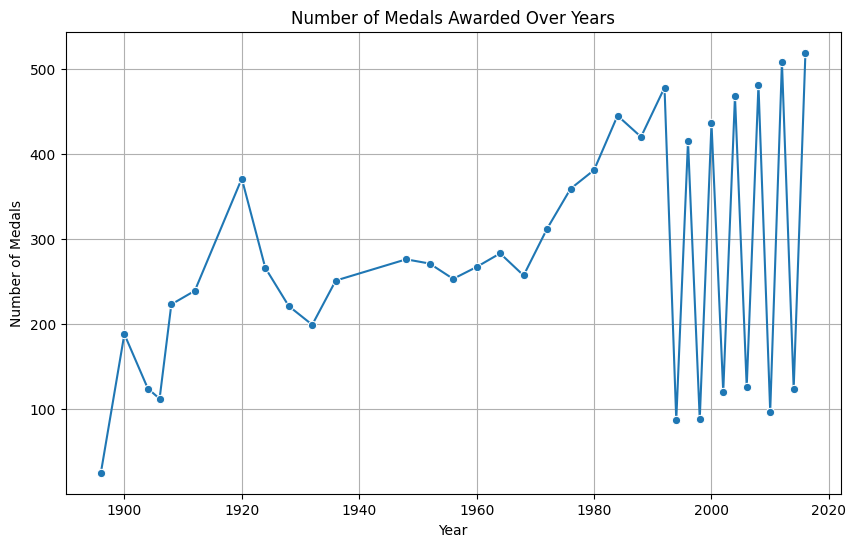

In [37]:
medals_by_year = df[df['Medal'].notnull()].groupby('Year')['Medal'].count()
plt.figure(figsize=(10, 6))
sns.lineplot(x=medals_by_year.index, y=medals_by_year.values, marker='o')
plt.title('Number of Medals Awarded Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.grid(True)
plt.show()


**For Top Countries Medal Distribution Over Time**

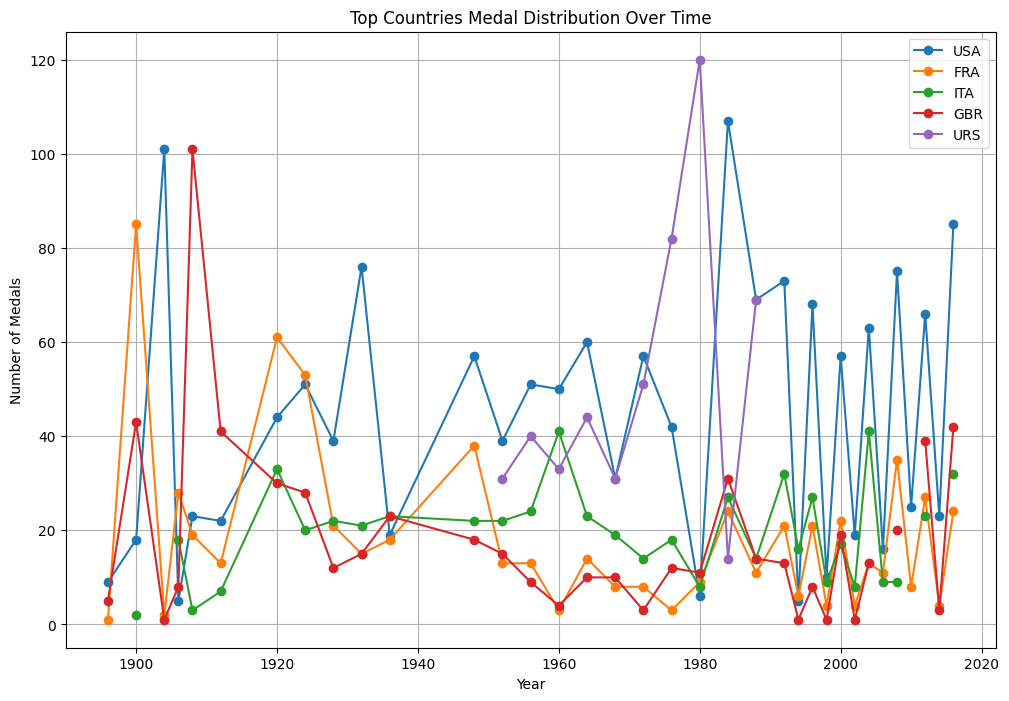

In [38]:
top_countries = medals_by_country.head(5).index.tolist()  # Top 5 countries
top_countries_medals_by_year = df[df['NOC'].isin(top_countries) & df['Medal'].notnull()].groupby(['NOC', 'Year'])['Medal'].count().unstack()
plt.figure(figsize=(12, 8))
for country in top_countries:
    plt.plot(top_countries_medals_by_year.loc[country], marker='o', label=country)

plt.title('Top Countries Medal Distribution Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend()
plt.grid(True)
plt.show()


# BAR PLOT

**For Top 20 Countries with Most Medals**

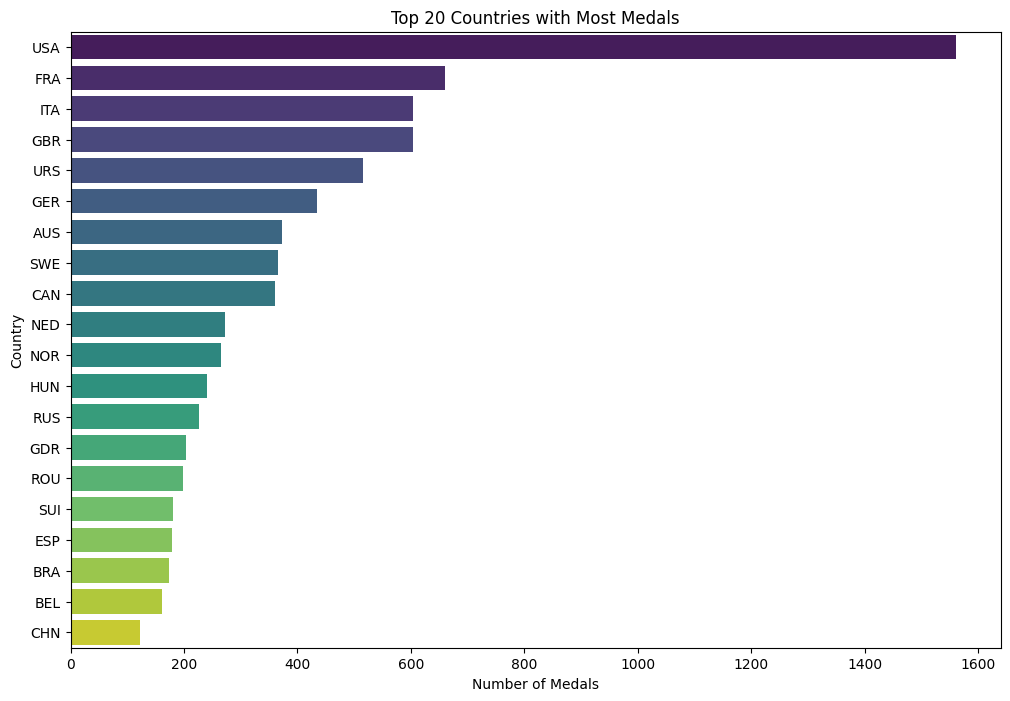

In [39]:
medals_by_country = df[df['Medal'].notnull()].groupby('NOC')['Medal'].count().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
top_countries = medals_by_country.head(20)  
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 20 Countries with Most Medals')
plt.xlabel('Number of Medals')
plt.ylabel('Country')
plt.show()


**For Number of Athletes in Each Sport**

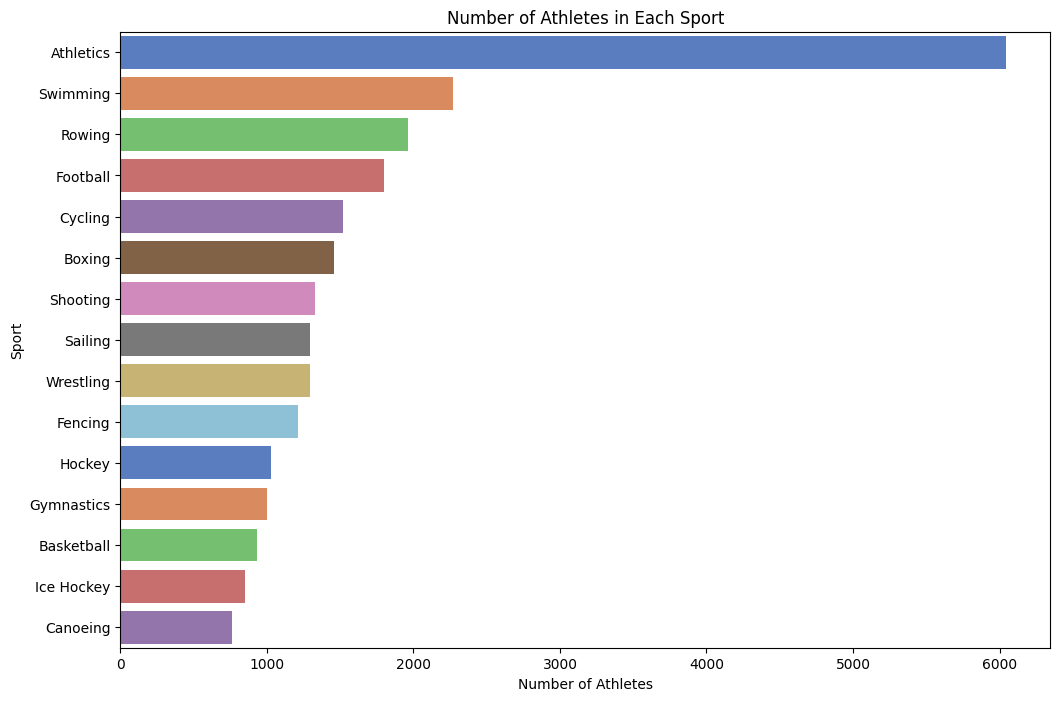

In [40]:
athletes_by_sport = df.groupby('Sport')['ID'].nunique().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
top_sports = athletes_by_sport.head(15)  # Top 15 sports
sns.barplot(x=top_sports.values, y=top_sports.index, palette='muted')
plt.title('Number of Athletes in Each Sport')
plt.xlabel('Number of Athletes')
plt.ylabel('Sport')
plt.show()


**For Top 15 Medal-Winning Events**

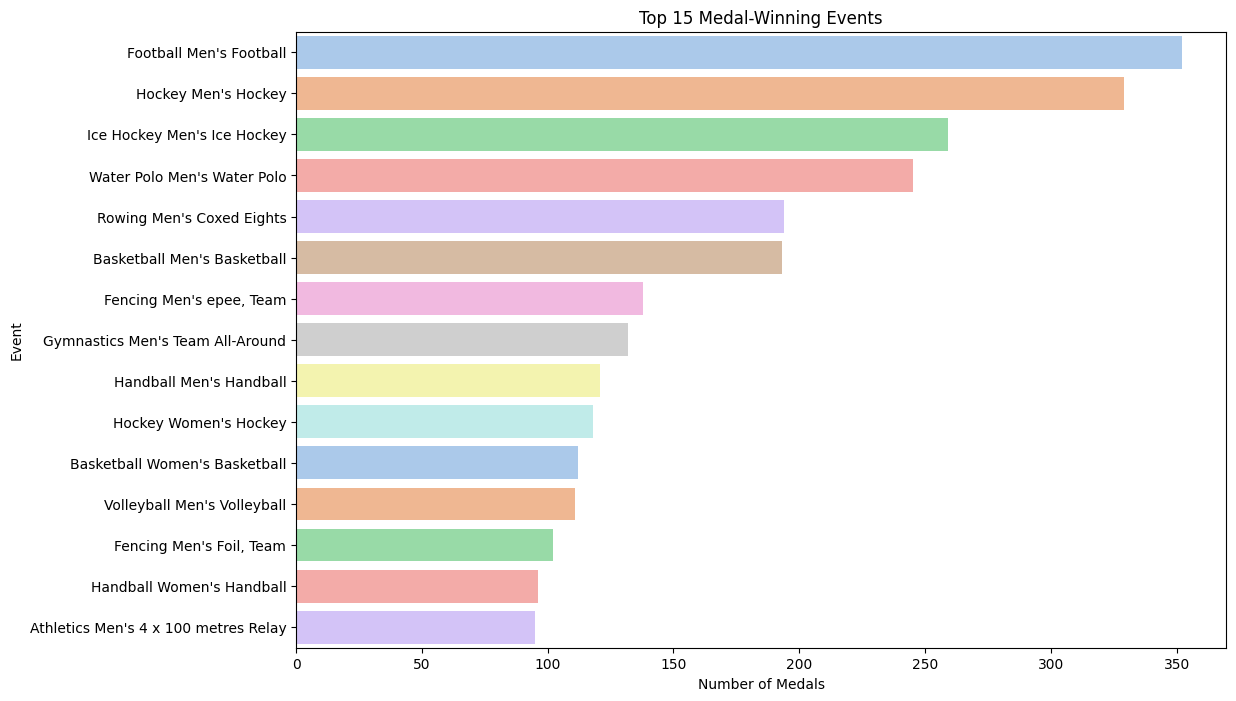

In [41]:
medals_by_event = df[df['Medal'].notnull()].groupby('Event')['Medal'].count().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
top_events = medals_by_event.head(15) 
sns.barplot(x=top_events.values, y=top_events.index, palette='pastel')
plt.title('Top 15 Medal-Winning Events')
plt.xlabel('Number of Medals')
plt.ylabel('Event')
plt.show()


**For Average Age of Medal Winners by Sport (Top 10)**

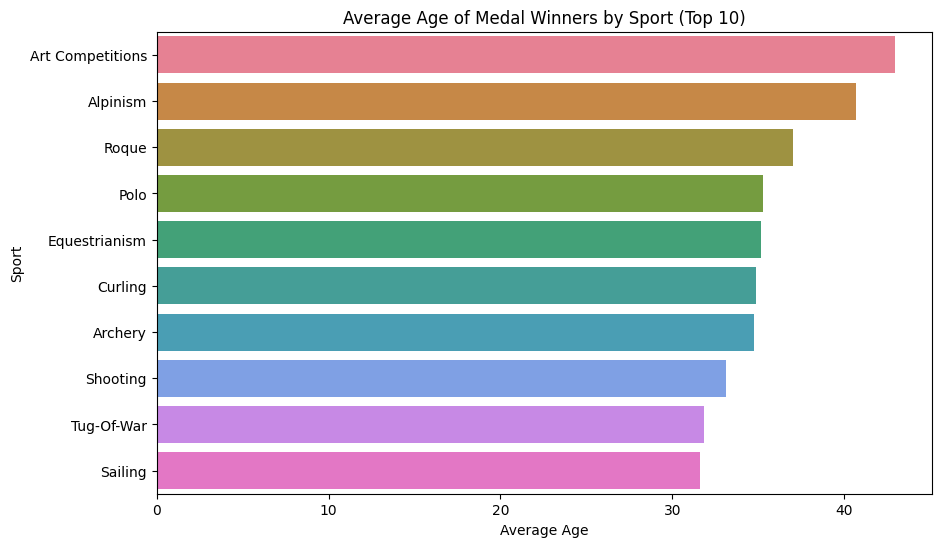

In [42]:
medalists_age_by_sport = df[df['Medal'].notnull()].groupby('Sport')['Age'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=medalists_age_by_sport.values, y=medalists_age_by_sport.index, palette='husl')
plt.title('Average Age of Medal Winners by Sport (Top 10)')
plt.xlabel('Average Age')
plt.ylabel('Sport')
plt.show()


**For Distribution of Medals by Sport**

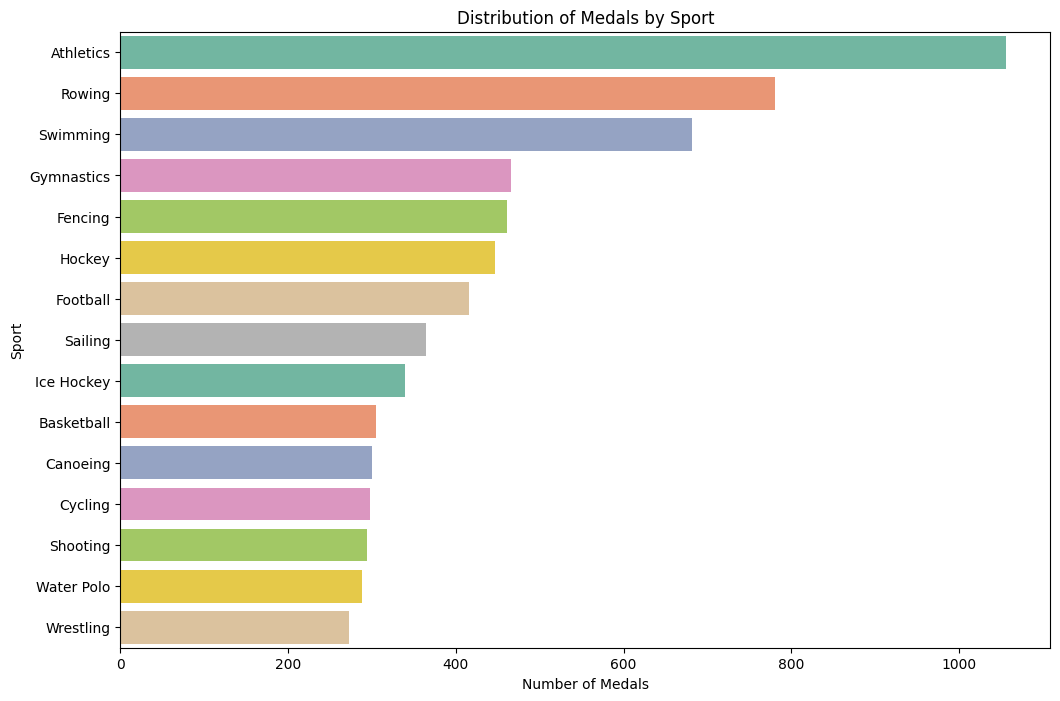

In [43]:
medals_by_sport = df[df['Medal'].notnull()].groupby('Sport')['Medal'].count().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
top_sports_medals = medals_by_sport.head(15)  # Top 15 sports
sns.barplot(x=top_sports_medals.values, y=top_sports_medals.index, palette='Set2')
plt.title('Distribution of Medals by Sport')
plt.xlabel('Number of Medals')
plt.ylabel('Sport')
plt.show()

# HISTOGRAM

**For Age Distribution of Medal Winners**

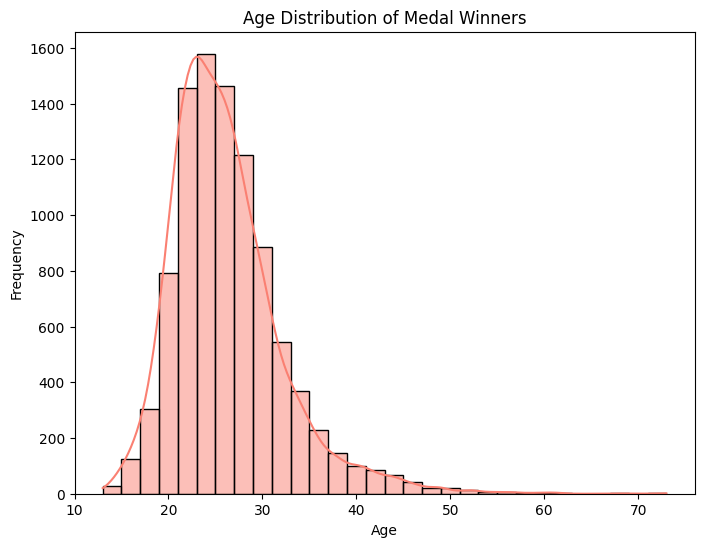

In [44]:
medalists_age_data = df[df['Medal'].notnull()]['Age'].dropna()
plt.figure(figsize=(8, 6))
sns.histplot(medalists_age_data, bins=30, kde=True, color='salmon')
plt.title('Age Distribution of Medal Winners')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# PIE CHART

**For Distribution of Medals by Gender**

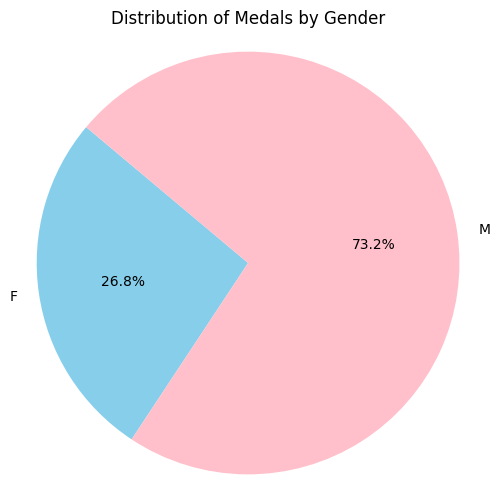

In [45]:
medals_by_gender = df[df['Medal'].notnull()].groupby('Sex')['Medal'].count()
plt.figure(figsize=(6, 6))
plt.pie(medals_by_gender, labels=medals_by_gender.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'pink'])
plt.title('Distribution of Medals by Gender')
plt.axis('equal')  
plt.show()


**For Distribution of Medals by Season**

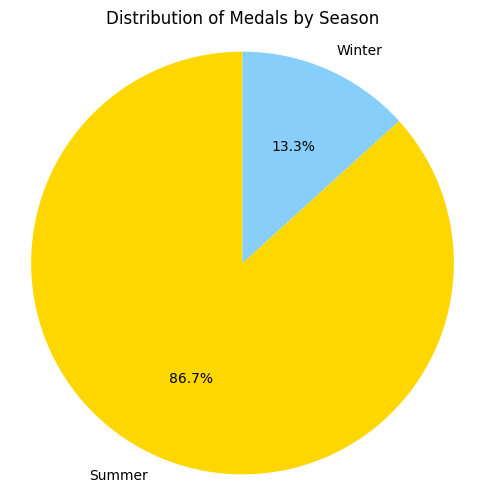

In [46]:
medals_by_season = df[df['Medal'].notnull()].groupby('Season')['Medal'].count()
plt.figure(figsize=(6, 6))
plt.pie(medals_by_season, labels=medals_by_season.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'lightskyblue'])
plt.title('Distribution of Medals by Season')
plt.axis('equal')
plt.show()

# SCATTERPLOT

**For Athlete Height vs. Weight**

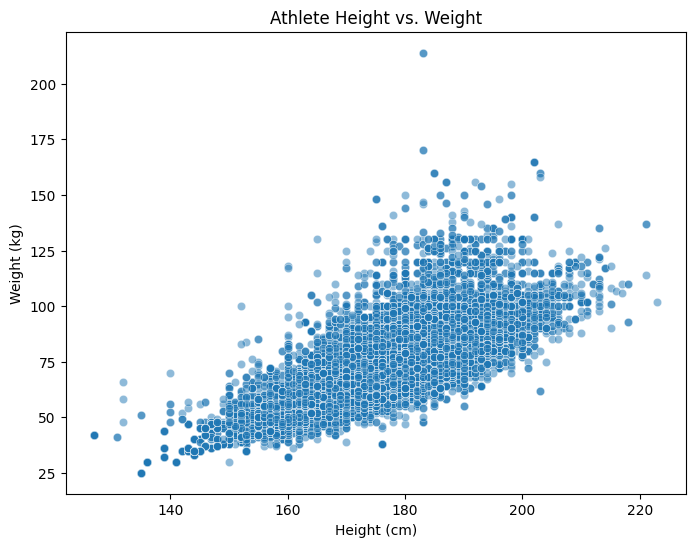

In [47]:
height_weight_data = df[['Height', 'Weight']].dropna()
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Height', y='Weight', data=height_weight_data, alpha=0.5)
plt.title('Athlete Height vs. Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()
